# Data Visualization

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
census_pop_csv = pd.read_csv("CensusTotalPopulation_perH.csv")
county_csv = pd.read_csv("countydata.csv")
white_csv = pd.read_csv("whitedata.csv")
black_csv = pd.read_csv("blackdata.csv")
hispanic_csv = pd.read_csv("hispanicdata.csv")
asian_csv = pd.read_csv("asiandata.csv")
indian_csv = pd.read_csv("indiandata.csv")

# fasttop_csv = pd.read_csv("Top10.csv")
# fastbottom_csv = pd.read_csv("bottom10.csv")
# hospital_csv = pd.read_csv("hospitals.csv")

In [4]:
census = census_pop_csv[["CountyName", "white_perh", "black_perh", "amerind_perh", 
                         "asian_perh", "nathaw_perh", "multi_perh", "hisp_perh"]]
census = census.rename(columns = {"CountyName" : "County"})
white = white_csv[["County", "Value", "Race/Ethnicity", "Lat", "Lng"]]
white = white.rename(columns = {"Value" : "white_val"})

black = black_csv[["County", "Value", "Race/Ethnicity"]]
black = black.rename(columns = {"Value" : "black_val"})

asian = asian_csv[["County", "Value", "Race/Ethnicity"]]
asian = asian.rename(columns = {"Value" : "asian_val"})

hispanic = hispanic_csv[["County", "Value", "Race/Ethnicity"]]
hispanic = hispanic.rename(columns = {"Value" : "hisp_val"})

indian = indian_csv[["County", "Value", "Race/Ethnicity"]]
indian = indian.rename(columns = {"Value" : "natamer_val"})

In [19]:
composite = pd.merge(census, white, how = "inner", on = "County")

In [17]:
composite = pd.merge(composite, black, how = "inner", on = "County")

In [25]:
len(census.County.unique())

1954

In [9]:
composite = pd.merge(composite, black, how = "inner", on = "County")
composite = pd.merge(composite, asian, how = "inner", on = "County")
composite = pd.merge(composite, hispanic, how = "inner", on = "County")
composite = pd.merge(composite, indian, how = "inner", on = "County")


,County,white_perh,black_perh,amerind_perh,asian_perh,nathaw_perh,multi_perh,hisp_perh
0,Los Angeles County,53431.166380,8344.055159,545.497219,13979.553053,261.414371,3888.481115,48129.068558
1,Madera County,82537.454412,3530.291502,1500.144308,2187.573794,166.609818,3351.874688,55105.213444
2,Marin County,79428.898529,2691.957228,262.459015,5671.684800,230.917205,4056.821987,15737.416375
3,Mariposa County,88320.517107,863.702218,3332.218879,1292.767190,412.348156,3555.109774,9634.458932
4,Mendocino County,82341.460074,804.684290,4758.480573,1791.991965,212.299685,3772.314295,23206.866639
5,Merced County,64521.480530,3484.207348,773.673689,7584.601447,218.646912,3942.142663,56293.934842
6,Modoc County,89941.081950,1156.936261,2528.119979,557.043385,0.000000,4413.497590,14408.141403
7,Mono County,84499.401113,443.880786,2677.376171,817.304305,930.035933,1683.928697,27076.727964
8,Monterey County,75269.163880,2783.066268,979.227020,6235.659301,513.735300,3671.924825,56456.991436
9,Napa County,77228.497770,2148.607211,499.809699,7441.132327,255.649789,3554.681048,32988.158244


In [6]:
avg_ethnic = composite[["white_perh", "black_perh", "amerind_perh", "asian_perh", "hisp_perh", 
                        "white_val", "black_val", "asian_val", "hisp_val", "natamer_val"]].mean()

In [50]:
avg_ethnic[0:11]

white_perh      84610.897827
black_perh       9597.599790
amerind_perh     1247.575394
asian_perh       1099.351145
hisp_perh        5204.428170
white_val         358.366530
black_val         418.970726
asian_val         195.977052
hisp_val          172.546151
natamer_val       345.573747
dtype: float64

# Lets Start plotting some sh*t

Heat of fast food

Heat of hospitals

pie chart of mortality by ethnicity

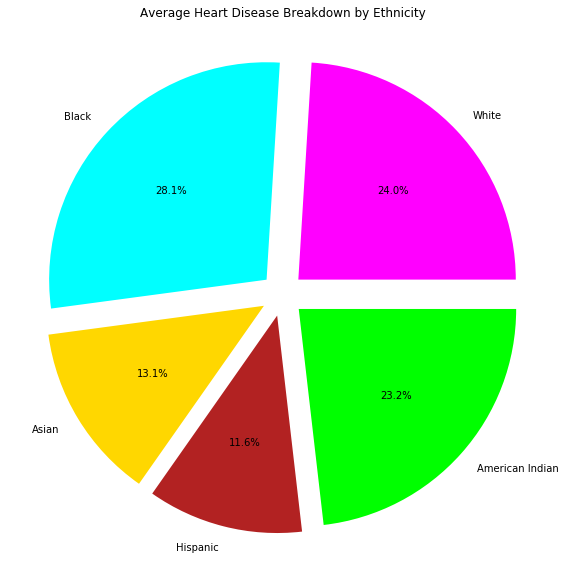

In [15]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1 = plt.pie(avg_ethnic[5:11], 
        labels = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        explode = (.1,.1,.1,.1,.1), 
        colors = col, autopct='%.1f%%')
fig1, plt.title("Average Heart Disease Breakdown by Ethnicity")
plt.show(fig1)


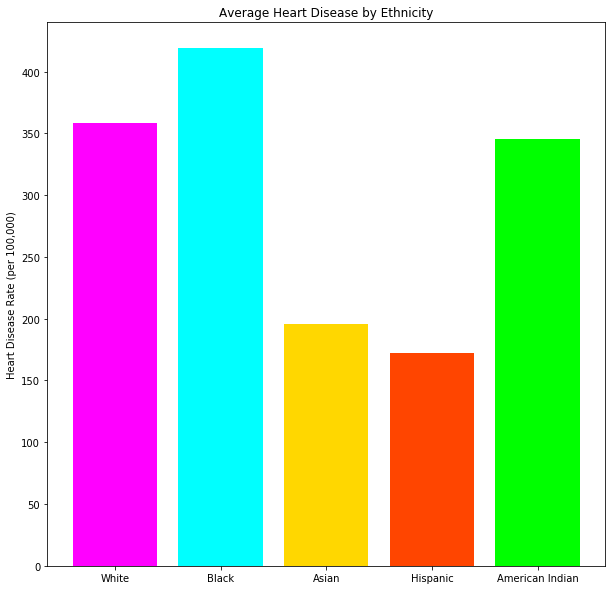

In [18]:
col = ["fuchsia", "cyan", "gold", "orangered", "lime"]
fig2, ax1 = plt.subplots(figsize=(10, 10))
fig2 = plt.bar(height = avg_ethnic[5:11], 
        x = ["White", "Black", "Asian", "Hispanic", "American Indian"],
        color = col)
fig2, plt.title("Average Heart Disease by Ethnicity")
fig2, plt.ylabel("Heart Disease Rate (per 100,000)")
plt.show(fig2)

pie chart of ethnic breakdown

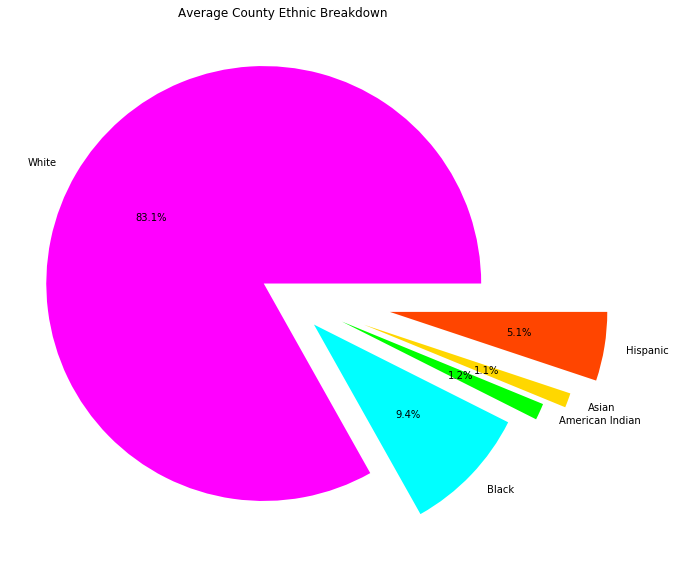

In [17]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig3, ax1 = plt.subplots(figsize=(10, 10))
fig3 = plt.pie(avg_ethnic[0:5], 
        labels = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        explode = (.1,.2,.3,.4,.5), 
        colors = col, autopct='%.1f%%')
fig3, plt.title("Average County Ethnic Breakdown")
plt.show(fig3)


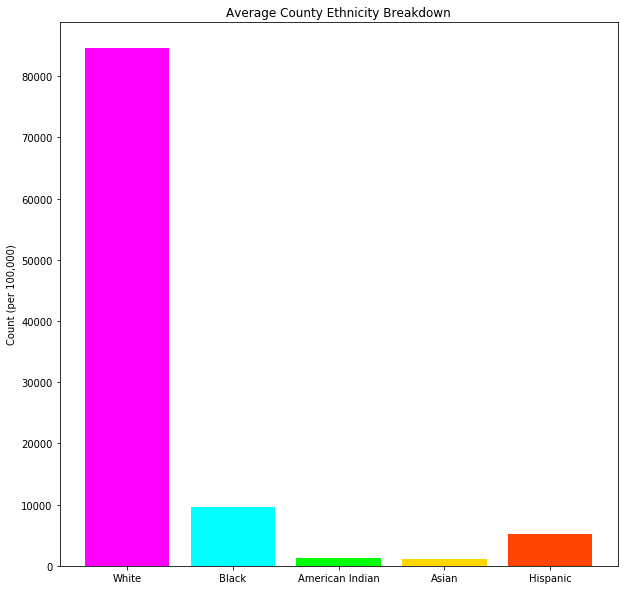

In [19]:
col = ["fuchsia", "cyan", "lime", "gold", "orangered" ]
fig4, ax1 = plt.subplots(figsize=(10, 10))
fig4 = plt.bar(height = avg_ethnic[0:5], 
        x = ["White", "Black", "American Indian", "Asian", "Hispanic"],
        color = col)
fig4, plt.title("Average County Ethnicity Breakdown")
fig4, plt.ylabel("Count (per 100,000)")
plt.show(fig4)

In [7]:
len(composite.white_perh)

36734974

mortality rate by number of hospitals

motrality rate by fast food